# COMP4702/7703 Prac 9: Combining Learners (Q1-Q4)

In [1]:
from mlp_model import *
from SupportCode.helpers import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set default figure size when plotting
plt.rcParams["figure.figsize"] = (12,8)
# Set default font size when plotting
plt.rcParams.update({'font.size': 15})

Instructions for updating:
non-resource variables are not supported in the long term


# Deep learning on Sonar Dataset 

### Setup data for training neural network

In [2]:
sonar = pd.read_csv("sonar.csv")
# Relabel columns as "x1" to "x60" for input and "r" for target
columns = ["x" + str(i) for i in range(1, len(sonar.columns))] + ["r"]
sonar.columns = columns

# Set seed to help reproduce results
np.random.seed(42)

# Randomly shuffle entire dataset (random partition)
sonar = sonar.iloc[np.random.permutation(len(sonar)), :].reset_index(drop=True)
sonar.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,r
0,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M
1,0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,...,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073,R
2,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048,R
3,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085,R
4,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M


### Interpretation of dataset: each sample (pattern) is a set of 60 numbers (x1 - x60) in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [3]:
# Form inputs and targets as numpy arrays
x_data = sonar[sonar.columns[:-1]].values
y_data = sonar[sonar.columns[-1]].values

In [4]:
temp_y = []
# Perform one hot encoding to be able to train neural net
for target in y_data:
    if target == "R":
        temp_y.append([1, 0])
    else:
        temp_y.append([0, 1])

y_data = np.array(temp_y)

In [5]:
# Training set
x_train = x_data[:int(2/3*len(x_data))]
y_train = y_data[:int(2/3*len(x_data))]

# Testing set
x_test = x_data[int(2/3*len(x_data)):]
y_test = y_data[int(2/3*len(x_data)):]

### Setup network

In [6]:
# Use ReLU activation function
activationFunction = tf.nn.relu

topology={}
# Use 2 hidden layers with 500 neurons in each layer
topology['hiddenDims'] = [500, 500]

# Q1 - Training network 10 times from random weight initialisations

In [7]:
# Optimisation dictionary for Adam optimiser
optDicAdam = {}
optDicAdam["optMethod"] = "Adam"

optDicAdam["learning_rate"] = 0.001
optDicAdam["beta1"] = 0.9
optDicAdam["beta2"] = 0.999

print("INITIAL HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                                      optDicAdam["beta1"],
                                                                                      optDicAdam["beta2"]))

data = x_train, y_train, x_test, y_test

# Store test set performance for every run
sonar_init_results = []
for i in range(1, 11):
    print(f"Model {i}: ")
    
    # Need to call this when producing multiple models or else tensorflow won't produce repeatable results
    tf.keras.backend.clear_session()
    
    # Train model using Adam optimiser with random weight initialisations using seed parameter below
    result = MLPModel(data, dataset="Sonar", topology=topology, optimiser=optDicAdam, act=activationFunction, max_steps=100,
                      path="Q1", seed=i)
    
    if result:
        sonar_init_results.append(result)

INITIAL HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Model 1: 
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Accuracy at step 0: 0.47142857
Accuracy at step 10: 0.5285714
Accuracy at step 20: 0.6857143
('Adding run metadata for', 24)
Accuracy at step 30: 0.78571427
Accuracy at step 40: 0.8142857
('Adding run metadata for', 49)
Accuracy at step 50: 0.78571427
Accuracy at step 60: 0.82857144
Accuracy at step 70: 0.82857144
('Adding run metadata for', 74)
Accuracy at step 80: 0.8
Accuracy at step 90: 0.87142855
('Adding run metadata for', 99)
Accuracy on test set: 0.8285714387893677


Model 2: 
Accuracy at step 0: 0.47142857
Accuracy at step 10: 0.55714285
Accuracy at step 20: 0.6857143
('Adding run metadata for', 24)
Accuracy at step 30: 0.74285716
Accuracy at step 40: 0.75714284
('Adding run metadata for', 49)
Accuracy at 

In [8]:
print(f"Minimum: {min(sonar_init_results)}")
print(f"Maximum: {max(sonar_init_results)}")
print(f"Mean: {np.mean(sonar_init_results)}")
print(f"Standard deviation: {np.std(sonar_init_results)}")

Minimum: 0.8285714387893677
Maximum: 0.9285714030265808
Mean: 0.8914285898208618
Standard deviation: 0.03207134082913399


### Plot test set results

Text(0.5, 1.0, 'Results from training network 10 times with random weight initialisations')

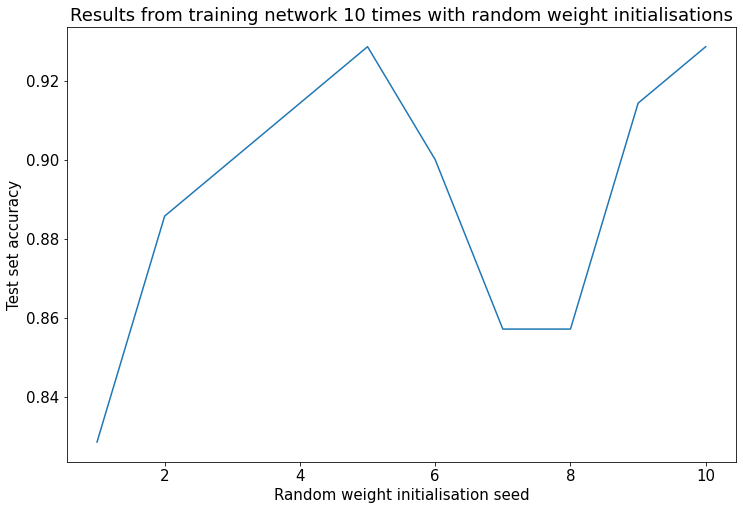

In [9]:
plt.plot(range(1, 11), sonar_init_results)
plt.xlabel("Random weight initialisation seed")
plt.ylabel("Test set accuracy")
plt.title("Results from training network 10 times with random weight initialisations")

### Find seed value for experiment from Q1 that was closest to mean result

In [10]:
seed_value = np.argmin(abs(np.array(sonar_init_results) - np.mean(sonar_init_results))) + 1
print(seed_value)

2


# For Q2-Q4, leave model hyperparameters (learning rate, betas for Adam optimiser, number of training epochs, number of hidden units) unchanged

# Q2 - Perform 10-fold CV

### Set up k-Fold Cross-Validation function thats splits training set into training and validation sets (leaving test set untouched for final models only)

In [11]:
# Number of times to split training set into 1/10 = 10% validation sets and 9/10 = 90% training sets for hyper-parameter
# optimisation
k = 10

def k_fold_cv(k, i, x_train, y_train):
    start_idx = int((i - 1)/k*len(x_train))
    end_idx = int(i/k*len(x_train))
    x_valid = x_train[start_idx:end_idx, :]
    y_valid = y_train[start_idx:end_idx, :]
    
    x_train = np.delete(x_train, [range(start_idx, end_idx)], axis=0)
    y_train = np.delete(y_train, [range(start_idx, end_idx)], axis=0)
    return x_train, y_train, x_valid, y_valid  

### Perform k-Fold CV leaving hyperparameters unchanged (as question asked)

In [12]:
# Already setup Adam optimiser dictinary in Q1, don't need to setup again
print("HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                              optDicAdam["beta1"],
                                                                              optDicAdam["beta2"]))

# Let x_train and y_train now be the whole dataset
x_train, y_train = x_data, y_data

# Store validation set performance for every run
sonar_valid_results = []
for i in range(1, k + 1):
    print(f"Fold {i}: ")
    
    # Already randomly shuffled data at start so no need to randomly shuffle again
    data = k_fold_cv(k, i, x_train, y_train)
    
    tf.keras.backend.clear_session()
    
    # Train model on ith fold
    result = MLPModel(data, dataset="Sonar", topology=topology, optimiser=optDicAdam, act=activationFunction, max_steps=100,
                      path="Q2", seed=seed_value)
    
    if result:
        sonar_valid_results.append(result)

HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Fold 1: 
Accuracy at step 0: 0.65
Accuracy at step 10: 0.75
Accuracy at step 20: 0.8
('Adding run metadata for', 24)
Accuracy at step 30: 0.85
Accuracy at step 40: 0.9
('Adding run metadata for', 49)
Accuracy at step 50: 0.8
Accuracy at step 60: 0.85
Accuracy at step 70: 0.8
('Adding run metadata for', 74)
Accuracy at step 80: 0.85
Accuracy at step 90: 0.85
('Adding run metadata for', 99)
Accuracy on test set: 0.8999999761581421


Fold 2: 
Accuracy at step 0: 0.0952381
Accuracy at step 10: 0.7619048
Accuracy at step 20: 0.85714287
('Adding run metadata for', 24)
Accuracy at step 30: 0.85714287
Accuracy at step 40: 0.8095238
('Adding run metadata for', 49)
Accuracy at step 50: 0.85714287
Accuracy at step 60: 0.8095238
Accuracy at step 70: 0.8095238
('Adding run metadata for', 74)
Accuracy at step 80: 0.8095238
Accuracy at step 90: 0.8095238
('Adding run metadata for', 99)
Accuracy on test set: 0.8095238208770752


Fold 3

In [38]:
print(f"Minimum: {min(sonar_valid_results)}")
print(f"Maximum: {max(sonar_valid_results)}")
print(f"Mean: {np.mean(sonar_valid_results)}")
print(f"Standard deviation: {np.std(sonar_valid_results)}")

Minimum: 0.7142857313156128
Maximum: 0.9523809552192688
Mean: 0.8323809504508972
Standard deviation: 0.07364188879728317


### Plot results

Text(0.5, 1.0, 'Results from k = 10-fold cross validation')

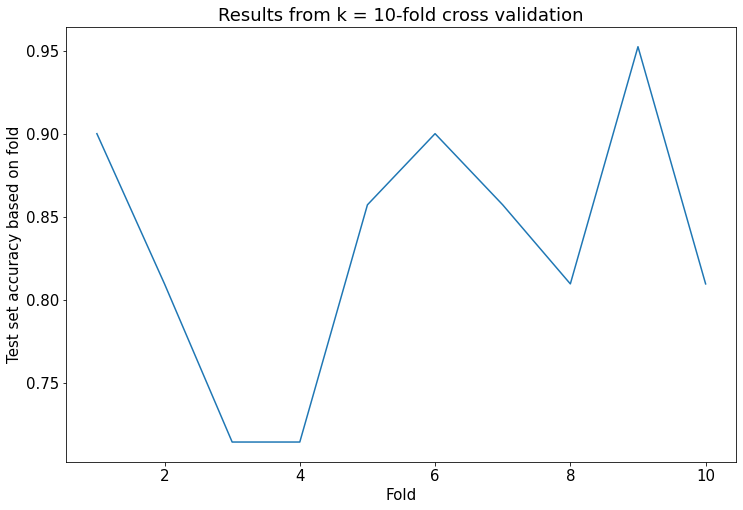

In [13]:
plt.plot(range(1, 11), sonar_valid_results)
plt.xlabel("Fold")
plt.ylabel("Test set accuracy based on fold")
plt.title("Results from k = " + str(k) + "-fold cross validation")

# Q3 - Retrain network 10 times based on 10 random partitions of the dataset

### Simply repeat earlier steps from Q1, this time ensuring Sonar dataset is randomly shuffled everytime inside loop

In [14]:
print("HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                              optDicAdam["beta1"],
                                                                              optDicAdam["beta2"]))

# Store test set performance for every run
sonar_partition_results = []
for i in range(1, 11):
    print(f"Iteration {i}: ")
    
    # Generate random parition of the dataset
    rand_sonar = sonar.iloc[np.random.permutation(len(sonar)), :].reset_index(drop=True)
    
    # Form inputs and targets as numpy arrays
    x_data = rand_sonar[rand_sonar.columns[:-1]].values
    y_data = rand_sonar[rand_sonar.columns[-1]].values
    
    temp_y = []
    # Perform one hot encoding to be able to train neural net
    for target in y_data:
        if target == "R":
            temp_y.append([1, 0])
        else:
            temp_y.append([0, 1])
    y_data = np.array(temp_y)
    
    # Training set
    x_train = x_data[:int(2/3*len(x_data))]
    y_train = y_data[:int(2/3*len(x_data))]
    
    # Testing set
    x_test = x_data[int(2/3*len(x_data)):]
    y_test = y_data[int(2/3*len(x_data)):]
    
    data = [x_train, y_train, x_test, y_test]
    
    tf.keras.backend.clear_session()
    
    # Train model using randomly partioned dataset
    result = MLPModel(data, dataset="Sonar", topology=topology, optimiser=optDicAdam, act=activationFunction, max_steps=100,
                      path="Q3", seed=seed_value)
    
    if result:
        sonar_partition_results.append(result)

HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Iteration 1: 
Accuracy at step 0: 0.5285714
Accuracy at step 10: 0.51428574
Accuracy at step 20: 0.6857143
('Adding run metadata for', 24)
Accuracy at step 30: 0.8142857
Accuracy at step 40: 0.78571427
('Adding run metadata for', 49)
Accuracy at step 50: 0.8428571
Accuracy at step 60: 0.8428571
Accuracy at step 70: 0.85714287
('Adding run metadata for', 74)
Accuracy at step 80: 0.82857144
Accuracy at step 90: 0.8
('Adding run metadata for', 99)
Accuracy on test set: 0.8142856955528259


Iteration 2: 
Accuracy at step 0: 0.45714286
Accuracy at step 10: 0.64285713
Accuracy at step 20: 0.71428573
('Adding run metadata for', 24)
Accuracy at step 30: 0.74285716
Accuracy at step 40: 0.8142857
('Adding run metadata for', 49)
Accuracy at step 50: 0.8142857
Accuracy at step 60: 0.78571427
Accuracy at step 70: 0.78571427
('Adding run metadata for', 74)
Accuracy at step 80: 0.78571427
Accuracy at step 90: 0.78571427
('Adding run m

In [15]:
print(f"Minimum: {min(sonar_partition_results)}")
print(f"Maximum: {max(sonar_partition_results)}")
print(f"Mean: {np.mean(sonar_partition_results)}")
print(f"Standard deviation: {np.std(sonar_partition_results)}")

Minimum: 0.699999988079071
Maximum: 0.8571428656578064
Mean: 0.7971428632736206
Standard deviation: 0.04462999477982521


### Plot test set results

Text(0.5, 1.0, 'Results from retraining network 10 times based on 10 random partitions of the dataset')

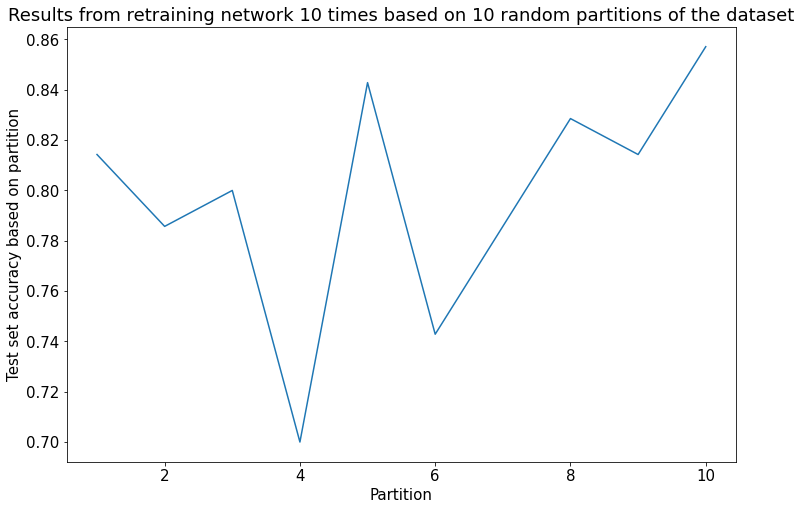

In [16]:
plt.plot(range(1, 11), sonar_partition_results)
plt.xlabel("Partition")
plt.ylabel("Test set accuracy based on partition")
plt.title("Results from retraining network 10 times based on 10 random partitions of the dataset")

# Q4 - Retrain network 10 times based on 10 boostrapped (resampled) datasets

In [17]:
print("HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                              optDicAdam["beta1"],
                                                                              optDicAdam["beta2"]))

# Store test set performance for every run
sonar_bootstrap_results = []
for i in range(1, 11):
    print(f"Iteration {i}: ")
    
    # Perform bootstrapping by resampling from original dataset
    rand_idxs = np.random.randint(0, len(sonar), len(sonar))
    bs_sonar = sonar.iloc[rand_idxs, :].reset_index(drop=True)
    
    # Training set = bootstrapped dataset
    x_train = bs_sonar[bs_sonar.columns[:-1]].values
    y_train = bs_sonar[bs_sonar.columns[-1]].values
    
    temp_y = []
    # Perform one hot encoding to be able to train neural net
    for target in y_train:
        if target == "R":
            temp_y.append([1, 0])
        else:
            temp_y.append([0, 1])
    y_train = np.array(temp_y)
    
    # Test set = everything in original dataset that is not in bootstrapped dataset (approx. 1/e = 37%)
    orig_idxs = []
    for idx in range(0, len(sonar)):
        if idx not in rand_idxs:
            orig_idxs.append(idx)
            
    x_test = sonar.iloc[orig_idxs, :-1].values
    y_test = np.array(sonar.iloc[orig_idxs, -1].values)
    
    temp_y = []
    # Perform one hot encoding to be able to test neural net
    for target in y_test:
        if target == "R":
            temp_y.append([1, 0])
        else:
            temp_y.append([0, 1])

    y_test = np.array(temp_y)

    data = [x_train, y_train, x_test, y_test]
    
    tf.keras.backend.clear_session()
    
    # Train model using bootstrapped dataset and test on samples from original dataset that did not appear in
    # bootstrapped dataset
    result = MLPModel(data, dataset="Sonar", topology=topology, optimiser=optDicAdam, act=activationFunction, max_steps=100,
                      path="Q4", seed=seed_value)
    
    if result:
        sonar_bootstrap_results.append(result)

HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Iteration 1: 
Accuracy at step 0: 0.43661973
Accuracy at step 10: 0.6056338
Accuracy at step 20: 0.69014084
('Adding run metadata for', 24)
Accuracy at step 30: 0.7605634
Accuracy at step 40: 0.7605634
('Adding run metadata for', 49)
Accuracy at step 50: 0.7887324
Accuracy at step 60: 0.8028169
Accuracy at step 70: 0.85915494
('Adding run metadata for', 74)
Accuracy at step 80: 0.8169014
Accuracy at step 90: 0.8028169
('Adding run metadata for', 99)
Accuracy on test set: 0.8309859037399292


Iteration 2: 
Accuracy at step 0: 0.4722222
Accuracy at step 10: 0.6388889
Accuracy at step 20: 0.6388889
('Adding run metadata for', 24)
Accuracy at step 30: 0.6666667
Accuracy at step 40: 0.6944444
('Adding run metadata for', 49)
Accuracy at step 50: 0.7222222
Accuracy at step 60: 0.75
Accuracy at step 70: 0.75
('Adding run metadata for', 74)
Accuracy at step 80: 0.75
Accuracy at step 90: 0.75
('Adding run metadata for', 99)
Accur

In [18]:
print(f"Minimum: {min(sonar_bootstrap_results)}")
print(f"Maximum: {max(sonar_bootstrap_results)}")
print(f"Mean: {np.mean(sonar_bootstrap_results)}")
print(f"Standard deviation: {np.std(sonar_bootstrap_results)}")

Minimum: 0.75
Maximum: 0.8513513803482056
Mean: 0.8098270297050476
Standard deviation: 0.030674388632178307


### Plot test set results

Text(0.5, 1.0, 'Results from retraining network 10 times based on 10 bootstrapped datasets')

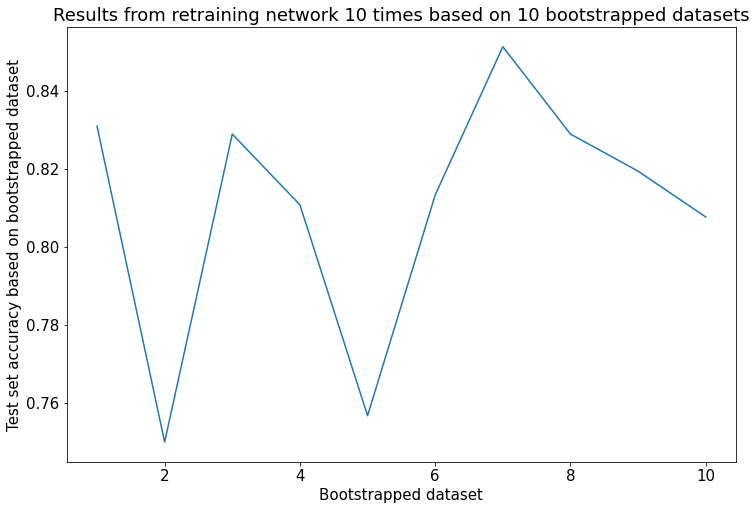

In [19]:
plt.plot(range(1, 11), sonar_bootstrap_results)
plt.xlabel("Bootstrapped dataset")
plt.ylabel("Test set accuracy based on bootstrapped dataset")
plt.title("Results from retraining network 10 times based on 10 bootstrapped datasets")

### 

### 

# Deep learning on Diabetes Dataset 

### Setup data for training neural network

In [20]:
diabetes = pd.read_csv("pima_indians_diabetes.csv")
columns = ["x" + str(i) for i in range(1, len(diabetes.columns))] + ["r"]
diabetes.columns = columns

# Set seed to help reproduce results
np.random.seed(42)

# Randomly shuffle entire dataset (random partition)
diabetes = diabetes.iloc[np.random.permutation(len(diabetes)), :].reset_index(drop=True)
diabetes.head()

,x1,x2,x3,x4,x5,x6,x7,x8,r
0,6,98,58,33,190,34.0,0.430,43,neg
1,2,112,75,32,0,35.7,0.148,21,neg
2,2,108,64,0,0,30.8,0.158,21,neg
3,8,107,80,0,0,24.6,0.856,34,neg
4,7,136,90,0,0,29.9,0.210,50,neg


### Interpretation of dataset: x1 = Number of pregnancies, x2 = Glucose level, x3 = Blood Pressure, x4 = Skin Thickness, x5 = Insulin level, x6 = BMI (Body Mass Index), x7 = Diabetes Pedigree Function, x8 = Age

In [21]:
# Form inputs and targets as numpy arrays
x_data = diabetes[diabetes.columns[:-1]].values
y_data = diabetes[diabetes.columns[-1]].values

In [22]:
temp_y = []
# Perform one hot encoding to be able to train neural net
for target in y_data:
    if target == "pos":
        temp_y.append([1, 0])
    else:
        temp_y.append([0, 1])

y_data = np.array(temp_y)

In [23]:
# Training set
x_train = x_data[:int(2/3*len(x_data))]
y_train = y_data[:int(2/3*len(x_data))]

# Testing set
x_test = x_data[int(2/3*len(x_data)):]
y_test = y_data[int(2/3*len(x_data)):]

### Setup network

In [24]:
# Use ReLU activation function
activationFunction = tf.nn.relu

topology={}
# Use 2 hidden layers with 500 neurons in each layer
topology['hiddenDims'] = [500, 500]

# Q1 - Training network 10 times from random weight initialisations

In [25]:
# Optimisation dictionary for Adam optimiser
optDicAdam = {}
optDicAdam["optMethod"] = "Adam"

optDicAdam["learning_rate"] = 0.001
optDicAdam["beta1"] = 0.9
optDicAdam["beta2"] = 0.999

print("INITIAL HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                                      optDicAdam["beta1"],
                                                                                      optDicAdam["beta2"]))

data = x_train, y_train, x_test, y_test

# Store test set performance for every run
diabetes_init_results = []
for i in range(1, 11):
    print(f"Model {i}: ")
    
    # Need to call this when producing multiple models or else tensorflow won't produce repeatable results
    tf.keras.backend.clear_session()
    
    # Train model using Adam optimiser with random weight initialisations using seed parameter below
    result = MLPModel(data, dataset="Diabetes", topology=topology, optimiser=optDicAdam, act=activationFunction,
                      max_steps=100, path="Q1", seed=i)
    
    if result:
        diabetes_init_results.append(result)

INITIAL HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Model 1: 
Accuracy at step 0: 0.375
Accuracy at step 10: 0.44140625
Accuracy at step 20: 0.6484375
('Adding run metadata for', 24)
Accuracy at step 30: 0.54296875
Accuracy at step 40: 0.6875
('Adding run metadata for', 49)
Accuracy at step 50: 0.703125
Accuracy at step 60: 0.67578125
Accuracy at step 70: 0.70703125
('Adding run metadata for', 74)
Accuracy at step 80: 0.61328125
Accuracy at step 90: 0.671875
('Adding run metadata for', 99)
Accuracy on test set: 0.6875


Model 2: 
Accuracy at step 0: 0.50390625
Accuracy at step 10: 0.61328125
Accuracy at step 20: 0.609375
('Adding run metadata for', 24)
Accuracy at step 30: 0.68359375
Accuracy at step 40: 0.671875
('Adding run metadata for', 49)
Accuracy at step 50: 0.6875
Accuracy at step 60: 0.72265625
Accuracy at step 70: 0.65625
('Adding run metadata for', 74)
Accuracy at step 80: 0.42578125
Accuracy at step 90: 0.7109375
('Adding run metadata for', 99)
Accura

In [26]:
print(f"Minimum: {min(diabetes_init_results)}")
print(f"Maximum: {max(diabetes_init_results)}")
print(f"Mean: {np.mean(diabetes_init_results)}")
print(f"Standard deviation: {np.std(diabetes_init_results)}")

Minimum: 0.53515625
Maximum: 0.703125
Mean: 0.639453113079071
Standard deviation: 0.05676978826522827


### Plot test set results

Text(0.5, 1.0, 'Results from training network 10 times with random weight initialisations')

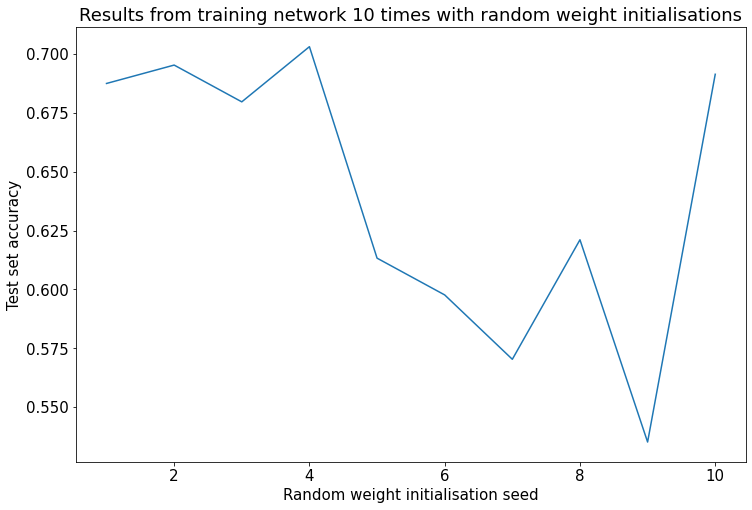

In [27]:
plt.plot(range(1, 11), diabetes_init_results)
plt.xlabel("Random weight initialisation seed")
plt.ylabel("Test set accuracy")
plt.title("Results from training network 10 times with random weight initialisations")

### Find seed value for experiment from Q1 that was closest to mean result

In [28]:
seed_value = np.argmin(abs(np.array(diabetes_init_results) - np.mean(diabetes_init_results))) + 1
print(seed_value)

8


# For Q2-Q4, leave model hyperparameters (learning rate, betas for Adam optimiser, number of training epochs, number of hidden units) unchanged

# Q2 - Perform 10-fold CV

### Perform k-Fold CV leaving hyperparameters unchanged (as question asked)

In [29]:
# Already setup Adam optimiser dictinary in Q1, don't need to setup again
print("HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                              optDicAdam["beta1"],
                                                                              optDicAdam["beta2"]))

# Let x_train and y_train now be the whole dataset
x_train, y_train = x_data, y_data

# Store validation set performance for every run
diabetes_valid_results = []
for i in range(1, k + 1):
    print(f"Fold {i}: ")
    
    # Already randomly shuffled data at start so no need to randomly shuffle again
    data = k_fold_cv(k, i, x_train, y_train)
    
    tf.keras.backend.clear_session()
    
    # Train model on ith fold
    result = MLPModel(data, dataset="Diabetes", topology=topology, optimiser=optDicAdam, act=activationFunction,
                      max_steps=100, path="Q2", seed=seed_value)
    
    if result:
        diabetes_valid_results.append(result)

HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Fold 1: 
Accuracy at step 0: 0.35526314
Accuracy at step 10: 0.65789473
Accuracy at step 20: 0.6315789
('Adding run metadata for', 24)
Accuracy at step 30: 0.6447368
Accuracy at step 40: 0.5263158
('Adding run metadata for', 49)
Accuracy at step 50: 0.6447368
Accuracy at step 60: 0.7105263
Accuracy at step 70: 0.7105263
('Adding run metadata for', 74)
Accuracy at step 80: 0.6052632
Accuracy at step 90: 0.69736844
('Adding run metadata for', 99)
Accuracy on test set: 0.6184210777282715


Fold 2: 
Accuracy at step 0: 0.36363637
Accuracy at step 10: 0.6363636
Accuracy at step 20: 0.6753247
('Adding run metadata for', 24)
Accuracy at step 30: 0.64935064
Accuracy at step 40: 0.6753247
('Adding run metadata for', 49)
Accuracy at step 50: 0.66233766
Accuracy at step 60: 0.6363636
Accuracy at step 70: 0.6883117
('Adding run metadata for', 74)
Accuracy at step 80: 0.6233766
Accuracy at step 90: 0.6753247
('Adding run metadata fo

In [39]:
print(f"Minimum: {min(diabetes_valid_results)}")
print(f"Maximum: {max(diabetes_valid_results)}")
print(f"Mean: {np.mean(diabetes_valid_results)}")
print(f"Standard deviation: {np.std(diabetes_valid_results)}")

Minimum: 0.5657894611358643
Maximum: 0.7532467246055603
Mean: 0.6469925045967102
Standard deviation: 0.07204470783472061


### Plot results

Text(0.5, 1.0, 'Results from k = 10-fold cross validation')

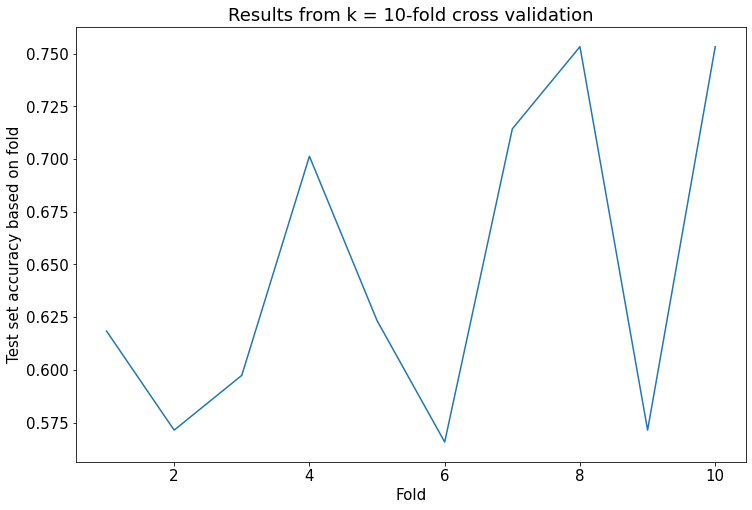

In [30]:
plt.plot(range(1, 11), diabetes_valid_results)
plt.xlabel("Fold")
plt.ylabel("Test set accuracy based on fold")
plt.title("Results from k = " + str(k) + "-fold cross validation")

# Q3 - Retrain network 10 times based on 10 random partitions of the dataset

### Simply repeat earlier steps from Q1, this time ensuring Diabetes dataset is randomly shuffled everytime inside loop

In [31]:
print("HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                              optDicAdam["beta1"],
                                                                              optDicAdam["beta2"]))

# Store test set performance for every run
diabetes_partition_results = []
for i in range(1, 11):
    print(f"Iteration {i}: ")
    
    # Generate random parition of the dataset
    rand_diabetes = diabetes.iloc[np.random.permutation(len(diabetes)), :].reset_index(drop=True)
    
    # Form inputs and targets as numpy arrays
    x_data = rand_diabetes[rand_diabetes.columns[:-1]].values
    y_data = rand_diabetes[rand_diabetes.columns[-1]].values
    
    temp_y = []
    # Perform one hot encoding to be able to train neural net
    for target in y_data:
        if target == "pos":
            temp_y.append([1, 0])
        else:
            temp_y.append([0, 1])
    y_data = np.array(temp_y)
    
    # Training set
    x_train = x_data[:int(2/3*len(x_data))]
    y_train = y_data[:int(2/3*len(x_data))]
    
    # Testing set
    x_test = x_data[int(2/3*len(x_data)):]
    y_test = y_data[int(2/3*len(x_data)):]
    
    data = [x_train, y_train, x_test, y_test]
    
    tf.keras.backend.clear_session()
    
    # Train model using randomly partioned dataset
    result = MLPModel(data, dataset="Diabetes", topology=topology, optimiser=optDicAdam, act=activationFunction,
                      max_steps=100, path="Q3", seed=seed_value)
    
    if result:
        diabetes_partition_results.append(result)

HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Iteration 1: 
Accuracy at step 0: 0.32421875
Accuracy at step 10: 0.6484375
Accuracy at step 20: 0.42578125
('Adding run metadata for', 24)
Accuracy at step 30: 0.3828125
Accuracy at step 40: 0.43359375
('Adding run metadata for', 49)
Accuracy at step 50: 0.49609375
Accuracy at step 60: 0.5859375
Accuracy at step 70: 0.66796875
('Adding run metadata for', 74)
Accuracy at step 80: 0.70703125
Accuracy at step 90: 0.671875
('Adding run metadata for', 99)
Accuracy on test set: 0.60546875


Iteration 2: 
Accuracy at step 0: 0.32421875
Accuracy at step 10: 0.6640625
Accuracy at step 20: 0.515625
('Adding run metadata for', 24)
Accuracy at step 30: 0.7109375
Accuracy at step 40: 0.5390625
('Adding run metadata for', 49)
Accuracy at step 50: 0.70703125
Accuracy at step 60: 0.70703125
Accuracy at step 70: 0.625
('Adding run metadata for', 74)
Accuracy at step 80: 0.6015625
Accuracy at step 90: 0.72265625
('Adding run metadata fo

In [32]:
print(f"Minimum: {min(diabetes_partition_results)}")
print(f"Maximum: {max(diabetes_partition_results)}")
print(f"Mean: {np.mean(diabetes_partition_results)}")
print(f"Standard deviation: {np.std(diabetes_partition_results)}")

Minimum: 0.41015625
Maximum: 0.7109375
Mean: 0.628125011920929
Standard deviation: 0.08315451443195343


### Plot test set results

Text(0.5, 1.0, 'Results from retraining network 10 times based on 10 random partitions of the dataset')

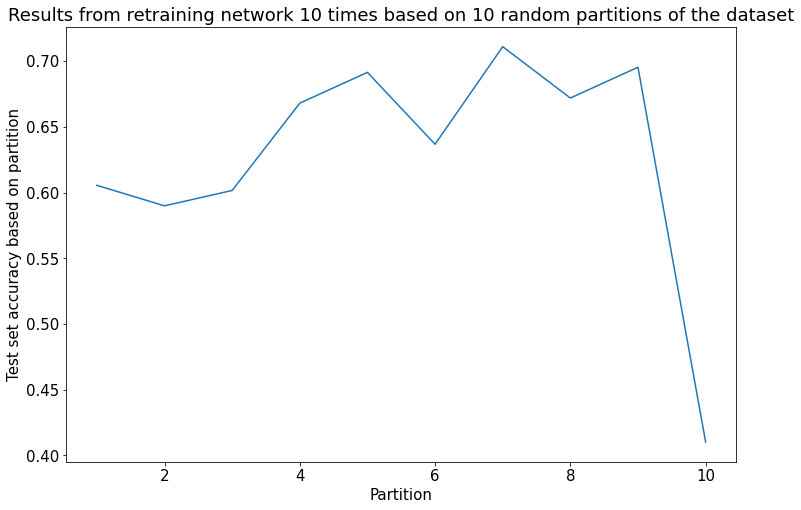

In [33]:
plt.plot(range(1, 11), diabetes_partition_results)
plt.xlabel("Partition")
plt.ylabel("Test set accuracy based on partition")
plt.title("Results from retraining network 10 times based on 10 random partitions of the dataset")

# Q4 - Retrain network 10 times based on 10 boostrapped (resampled) datasets

In [34]:
print("HYPERPARAMETERS: learning rate = {0}, beta1 = {1}, beta2 = {2}".format(optDicAdam["learning_rate"],
                                                                              optDicAdam["beta1"],
                                                                              optDicAdam["beta2"]))

# Store test set performance for every run
diabetes_bootstrap_results = []
for i in range(1, 11):
    print(f"Iteration {i}: ")
    
    # Perform bootstrapping by resampling from original dataset
    rand_idxs = np.random.randint(0, len(diabetes), len(diabetes))
    bs_diabetes = diabetes.iloc[rand_idxs, :].reset_index(drop=True)
    
    # Training set = bootstrapped dataset
    x_train = bs_diabetes[bs_diabetes.columns[:-1]].values
    y_train = bs_diabetes[bs_diabetes.columns[-1]].values
    
    temp_y = []
    # Perform one hot encoding to be able to train neural net
    for target in y_train:
        if target == "pos":
            temp_y.append([1, 0])
        else:
            temp_y.append([0, 1])
    y_train = np.array(temp_y)
    
    # Test set = everything in original dataset that is not in bootstrapped dataset (approx. 1/e = 37%)
    orig_idxs = []
    for idx in range(0, len(diabetes)):
        if idx not in rand_idxs:
            orig_idxs.append(idx)
            
    x_test = diabetes.iloc[orig_idxs, :-1].values
    y_test = np.array(diabetes.iloc[orig_idxs, -1].values)
    
    temp_y = []
    # Perform one hot encoding to be able to test neural net
    for target in y_test:
        if target == "pos":
            temp_y.append([1, 0])
        else:
            temp_y.append([0, 1])

    y_test = np.array(temp_y)

    data = [x_train, y_train, x_test, y_test]
    
    tf.keras.backend.clear_session()
    
    # Train model using bootstrapped dataset and test on samples from original dataset that did not appear in
    # bootstrapped dataset
    result = MLPModel(data, dataset="Diabetes", topology=topology, optimiser=optDicAdam, act=activationFunction,
                      max_steps=100, path="Q4", seed=seed_value)
    
    if result:
        diabetes_bootstrap_results.append(result)

HYPERPARAMETERS: learning rate = 0.001, beta1 = 0.9, beta2 = 0.999
Iteration 1: 
Accuracy at step 0: 0.39175257
Accuracy at step 10: 0.6460481
Accuracy at step 20: 0.5463917
('Adding run metadata for', 24)
Accuracy at step 30: 0.6185567
Accuracy at step 40: 0.6082474
('Adding run metadata for', 49)
Accuracy at step 50: 0.6838488
Accuracy at step 60: 0.61168385
Accuracy at step 70: 0.6975945
('Adding run metadata for', 74)
Accuracy at step 80: 0.6323024
Accuracy at step 90: 0.65292096
('Adding run metadata for', 99)
Accuracy on test set: 0.6597937941551208


Iteration 2: 
Accuracy at step 0: 0.3485342
Accuracy at step 10: 0.35179153
Accuracy at step 20: 0.6547231
('Adding run metadata for', 24)
Accuracy at step 30: 0.6612378
Accuracy at step 40: 0.6514658
('Adding run metadata for', 49)
Accuracy at step 50: 0.67752445
Accuracy at step 60: 0.51140064
Accuracy at step 70: 0.6905537
('Adding run metadata for', 74)
Accuracy at step 80: 0.67752445
Accuracy at step 90: 0.6286645
('Adding run 

In [35]:
print(f"Minimum: {min(diabetes_bootstrap_results)}")
print(f"Maximum: {max(diabetes_bootstrap_results)}")
print(f"Mean: {np.mean(diabetes_bootstrap_results)}")
print(f"Standard deviation: {np.std(diabetes_bootstrap_results)}")

Minimum: 0.4615384638309479
Maximum: 0.694915235042572
Mean: 0.6240484118461609
Standard deviation: 0.06509009748697281


### Plot test set results

Text(0.5, 1.0, 'Results from retraining network 10 times based on 10 bootstrapped datasets')

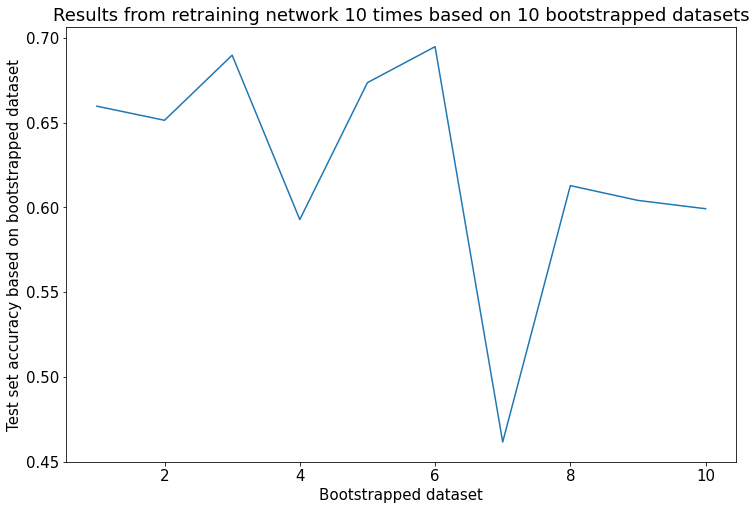

In [36]:
plt.plot(range(1, 11), diabetes_bootstrap_results)
plt.xlabel("Bootstrapped dataset")
plt.ylabel("Test set accuracy based on bootstrapped dataset")
plt.title("Results from retraining network 10 times based on 10 bootstrapped datasets")

### 

### 

# Combined results

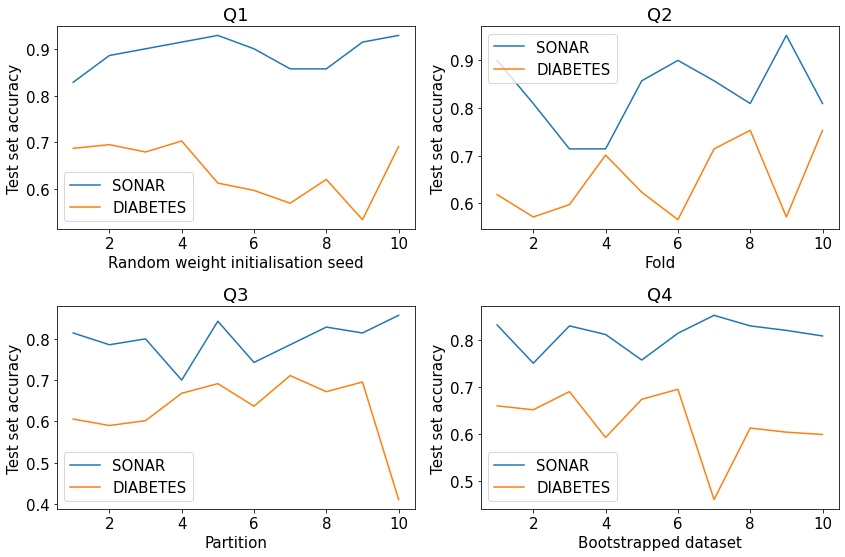

In [37]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(1, 11), sonar_init_results, label="SONAR")
axs[0, 0].plot(range(1, 11), diabetes_init_results, label="DIABETES")
axs[0, 0].set_xlabel("Random weight initialisation seed")
axs[0, 0].set_ylabel("Test set accuracy")
axs[0, 0].set_title("Q1")
axs[0, 0].legend()


axs[0, 1].plot(range(1, 11), sonar_valid_results, label="SONAR")
axs[0, 1].plot(range(1, 11), diabetes_valid_results, label="DIABETES")
axs[0, 1].set_xlabel("Fold")
axs[0, 1].set_ylabel("Test set accuracy")
axs[0, 1].set_title("Q2")
axs[0, 1].legend()

axs[1, 0].plot(range(1, 11), sonar_partition_results, label="SONAR")
axs[1, 0].plot(range(1, 11), diabetes_partition_results, label="DIABETES")
axs[1, 0].set_xlabel("Partition")
axs[1, 0].set_ylabel("Test set accuracy")
axs[1, 0].set_title("Q3")
axs[1, 0].legend()

axs[1, 1].plot(range(1, 11), sonar_bootstrap_results, label="SONAR")
axs[1, 1].plot(range(1, 11), diabetes_bootstrap_results, label="DIABETES")
axs[1, 1].set_xlabel("Bootstrapped dataset")
axs[1, 1].set_ylabel("Test set accuracy")
axs[1, 1].set_title("Q4")
axs[1, 1].legend()

fig.tight_layout()